In [23]:
import os
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [24]:
data_path = 'processed_data'
paths = []
x = []
labels = []
i = 0
with open('label.txt', 'w') as f:
    for label, dir in enumerate(os.listdir(data_path)):
        video_folder = os.path.join(data_path, dir)
        f.write('{}\n'.format(dir))
        for path in os.listdir(video_folder):
            video_path = os.path.join(video_folder, path)
            paths.append(video_path)
            labels.append(label)
            x.append(i)
            i += 1
x = np.asarray(x)
y = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [25]:
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
torch.save(class_weights, 'class_weights.pt')

In [26]:
train_data = {
    'paths': [paths[i] for i in X_train],
    'labels': [x[i] for i in y_train],
}
val_data = {
    'paths': [paths[i] for i in X_test],
    'labels': [x[i] for i in y_test],
}

In [27]:
df_train = pd.DataFrame(train_data)
df_val = pd.DataFrame(val_data)

In [28]:
df_train.to_csv('train_data.csv', index=False)
df_val.to_csv('val_data.csv', index=False)

([<matplotlib.axis.XTick at 0x1a2eb644760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21')])

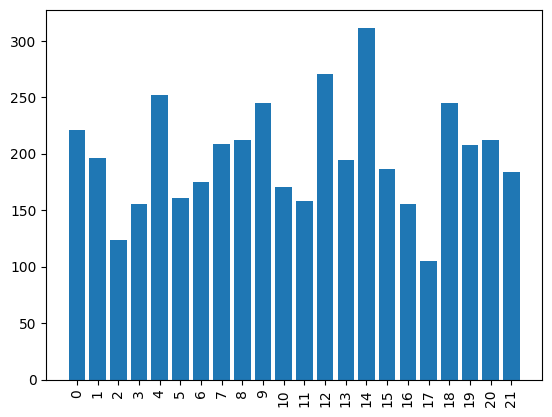

In [29]:
import os
import matplotlib.pyplot as plt
path = 'processed_data'
l = [len(os.listdir(os.path.join(path, dir))) for dir in os.listdir(path)]
plt.bar(np.arange(len(l)), l, align='center')
plt.xticks(np.arange(len(l)), rotation=90)